# Khởi tạo một số thư viện cần thiết 

In [62]:
from sklearn import datasets, neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import math

# Load bộ dữ liệu MNIST
Bộ dữ liệu có 1779 ảnh là chữ viết tay các con số từ 0->9

In [3]:
digit = datasets.load_digits()
# Ma trận pixel: 8x8
digit_X = digit.data
# Nhãn tương ứng 
digit_Y = digit.target

Labels of image: 0


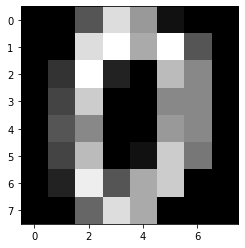

In [4]:
plt.gray()
plt.imshow(digit_X[0].reshape(8, 8))
print('Labels of image: {}'.format(digit_Y[0]))

### . Chia train, test sử dụng train_test_split của sklearn

In [5]:
X_train, X_test, y_train, y_test = train_test_split(digit_X, digit_Y, test_size = 360)

# Xây dựng model KNN bằng numpy

### Hàm tính khoảng cách giữa 2 data point

In [7]:
def calculate_distance(p1,p2):
    distance = 0
    for i in range(len(p1)):
        distance += (p1[i] - p2[i])*(p1[i] - p2[i])
    return distance**0.5

### Hàm xác định K láng giềng

In [57]:
# Hàm tìm ra K láng giềng (K điểm gần nhất)
def get_k_neighbors(X_train, label_y, point, k): 
    '''
    X_train
    label_y 
    point: điểm dữ liệu đang xét
    k
    
    Return: K láng giềng gần nhất
    ''' 
    # Tạo matrix lưu trữ khoảng cách
    distances = []
    # Tạo matrix lưu trữ K điểm láng giềng
    neighbors = []

    # Tính khoảng cách từ điểm đang xét đến tất cả các điểm trong tập training_X
    for i in range(len(X_train)):
        distance = calculate_distance(X_train[i], point)
        distances.append(distance)

    # Tìm ra K điểm có khoảng cách nhỏ nhất
    index = [] # Lưu vị trí K điểm cần tìm 
    while len(neighbors) < k:
        i = 0
        min_distance = distances[0]
        min_idx = 0
        while i < len(distances):
            # Skip qua nếu điểm đó đã được xét
            if i in index:
                i+=1
                continue
            # Update khoảng cách nhỏ nhất và vị trí
            if distances[i] < min_distance:
                min_distance = distances[i]
                min_idx = i
            i+=1

        # Add index và skip đến bước tiếp theo
        index.append(min_idx)
        neighbors.append(label_y[min_idx])

    return neighbors

### Hàm dự đoán

In [51]:
def predict(X_train, label_y, point, k):
    # Nhãn của K điểm gần nhất
    neighbor_labels = get_k_neighbors(X_train, label_y, point, k)
    # Tạo một matrix có length=10 tương ứng với 10 nhãn từ 0->9
    labels_count = [0,0,0,0,0,0,0,0,0,0]
    for label in neighbor_labels:
        labels_count[label] += 1
    # Nhãn predict là nhãn có lượng votes cao nhất
    max_count = max(labels_count)
    return labels_count.index(max_count)

# Dự đoán và đánh giá

In [71]:
y_predict_3 = []
y_predict_5 = []
y_predict_10 = []
y_predict_100 = []
for p in tqdm(X_test):
    # K=3
    label = predict(X_train, y_train, p, 3)
    y_predict_3.append(label)
    # K=5
    label = predict(X_train, y_train, p, 5)
    y_predict_5.append(label)
    # K=10
    label = predict(X_train, y_train, p, 10)
    y_predict_10.append(label)
    # K=100
    label = predict(X_train, y_train, p, 100)
    y_predict_100.append(label)


100%|████████████████████████████████████████████████████████████████████████████████| 360/360 [03:23<00:00,  1.77it/s]


In [73]:
print('Score with k=3: {}'.format(accuracy_score(y_predict_3, y_test)))
print('Score with k=5: {}'.format(accuracy_score(y_predict_5, y_test)))
print('Score with k=10: {}'.format(accuracy_score(y_predict_10, y_test)))
print('Score with k=100: {}'.format(accuracy_score(y_predict_100, y_test)))

Score with k=3: 0.9916666666666667
Score with k=5: 0.9916666666666667
Score with k=10: 0.9888888888888889
Score with k=100: 0.9444444444444444


# Gọi và sử dụng KNN trong thư viện sklearn

In [69]:
knn_model = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)
y_predict_sklearn = knn.predict(X_test)

In [70]:
accuracy_score(y_predict_sklearn, y_test)

0.9916666666666667